## Titanic - Machine Learning from Disaster

> This is my "Project 1" in the "Big Data Visualization for Business Communications" course. I'm planning to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. This is also a competition in Kaggle so I decided to do it to challenge myself. Let's see how this goes:

### Instructions:

You are tasked with performing analysis on a regression dataset of your choice from Kaggle. Your goal is to predict a target variable based on a set of features. Follow the steps outlined below to conduct a comprehensive analysis:

1. Upload the Dataset: Obtain a regression dataset of your choice from Kaggle and upload it to your working environment.

2. Describe the Dataset: Provide a brief overview of the dataset, including the number of observations, features, and a description of each variable.
3. Perform Data Wrangling/Encoding: Clean the dataset by handling missing values, duplicates, and outliers. Perform any necessary encoding for categorical variables.
3. Define Features and Target Variable: Define the features (independent variables) and the target variable (dependent variable) that you will be using for analysis.
4. Perform Basic EDA: Use various visualization techniques such as barcharts, histograms, scatterplots, facetgrid, and boxplots to explore the relationships between variables. Choose any two visualization techniques of your choice.
Create Heatmap: Create a heatmap to visualize the correlation between features and the target variable.
5. Split the Data into Train and Test Sets: Split the dataset into training and testing sets using a ratio of 80/20 or 70/30. 
Choose a random state of 0 or 42 for consistency.
6. Utilize Standard Scaling: Standardize the features using standard scaling to ensure all variables are on the same scale.
7. Perform Linear Regression: Implement linear regression to predict the target variable. Determine the accuracy of the model using appropriate evaluation metrics.
8. Upload Submission: Compile your analysis and code into a Jupyter Notebook (.ipynb) or Google Colab. Additionally, create a PDF version of your notebook for submission.
9. Upload to GitHub: Upload your Jupyter Notebook and PDF submission to your GitHub repository for version control and sharing.


**Finally,** Prepare a presentation to explain your project findings to the class. Include an overview of the dataset, data preprocessing steps, model implementation, evaluation metrics, and key insights.


### Let's do it

First, let's import all the neccesary libraries

In [195]:
# Importing the neccessary libraries

# For data manipulation
import pandas as pd
import numpy as np

# For Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

1. Upload the dataset

In [196]:
df = pd.read_csv('train.csv')

In [197]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Describe the dataset

Overview of the features:

`survival:` Indicates whether the passenger survives or not (0=No 1=Yes)  
`pclass:` Indicates the passenger trip class (1 = 1st, 2 = 2nd, 3 = 3rd)  
`sex:` Sex of the passenger  
`Age:` Age in years  
`sibsp:` # of siblings / spouses aboard the Titanic  
`parch:` # of parents / children aboard the Titanic  
`ticket:` Ticket number  
`fare:` Passenger fare  
`cabin:` Cabin number  
`embarked:` Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  


Variable Notes:

`pclass:` A proxy for socio-economic status (SES)  
* 1st = Upper  
* 2nd = Middle  
* 3rd = Lower 

`age:` Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`sibsp:` The dataset defines family relations in this way...  
* Sibling = brother, sister, stepbrother, stepsister  
* Spouse = husband, wife (mistresses and fiancés were ignored)  

`parch:` The dataset defines family relations in this way...  
* Parent = mother, father  
* Child = daughter, son, stepdaughter, stepson  
* Some children travelled only with a nanny, therefore parch=0 for them.  

In [198]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> The previous output specifies that the data set has 12 columns and 891 rows. It also states that the data types within the dataset are all correct. For this modeling, I was provided with two similar datasets as follows: 

> `Train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.  
The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

3. Perform Data Wrangling/Encoding:

#### Handling missing values

In [200]:
# Checking for missing values
df.isna().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

> Notice that the data contains missing values in some features. There are 687 null values in "Cabin", 177 null values in "Age", and 2 null values in "Embarked". I'll need to address these missing values before proceeding with the analysis. To decide, it is better first to understand the data type in each column.

> As I discovered previously, the column `Cabin` and `Embarked` are categorical, and the `Age` is numerical. I will use median and mode imputation for `Age` and `Embarked` respectively, and I will drop `Cabin` given the number of null, the data type, and the possible relationship with `Pclass` feature.


In [201]:
# Understanding the Cabin values
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [202]:
# Median imputation for Age column
df['Age'] = df['Age'].fillna(df['Age'].median())

# Mode imputation for Embarked column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Dropping the Cabin column
df = df.drop('Cabin', axis=1)



In [203]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [204]:
# Checking for missing values
df.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Cheching for duplicates

In [205]:
# Checking for duplicates
df.duplicated().sum()


0

> No duplicated rows found

#### Checking outliers

> Let's use Interquartile Range (IQR) to see how the outliers are distributed in the dataset. This method focuses on the quartiles of the data distribution. Outliers fall outside the upper and lower bounds calculated using the IQR and a threshold multiplier (typically 1.5). IQR is less sensitive to extreme outliers compared to z-scores and works well for skewed data.

In [206]:
# Identifying outliers in each column

def get_outliers(df):
    outliers = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers

outliers = get_outliers(df)

In [207]:
# Dataframe with outliers
outliers_df = pd.DataFrame(outliers.items(), columns=['column_name', 'outliers_count'])
outliers_df = outliers_df.sort_values(by='outliers_count', ascending=False)
outliers_df.head(10)

,column_name,outliers_count
5,Parch,213
6,Fare,116
3,Age,66
4,SibSp,46
0,PassengerId,0
1,Survived,0
2,Pclass,0


> Notice that there are 4 columns with potentially outliers values. Before taking any action, it's important to understand the outliers. Are they genuine data points or are errors is the main question. Let's plot a `Boxplot` before any action.

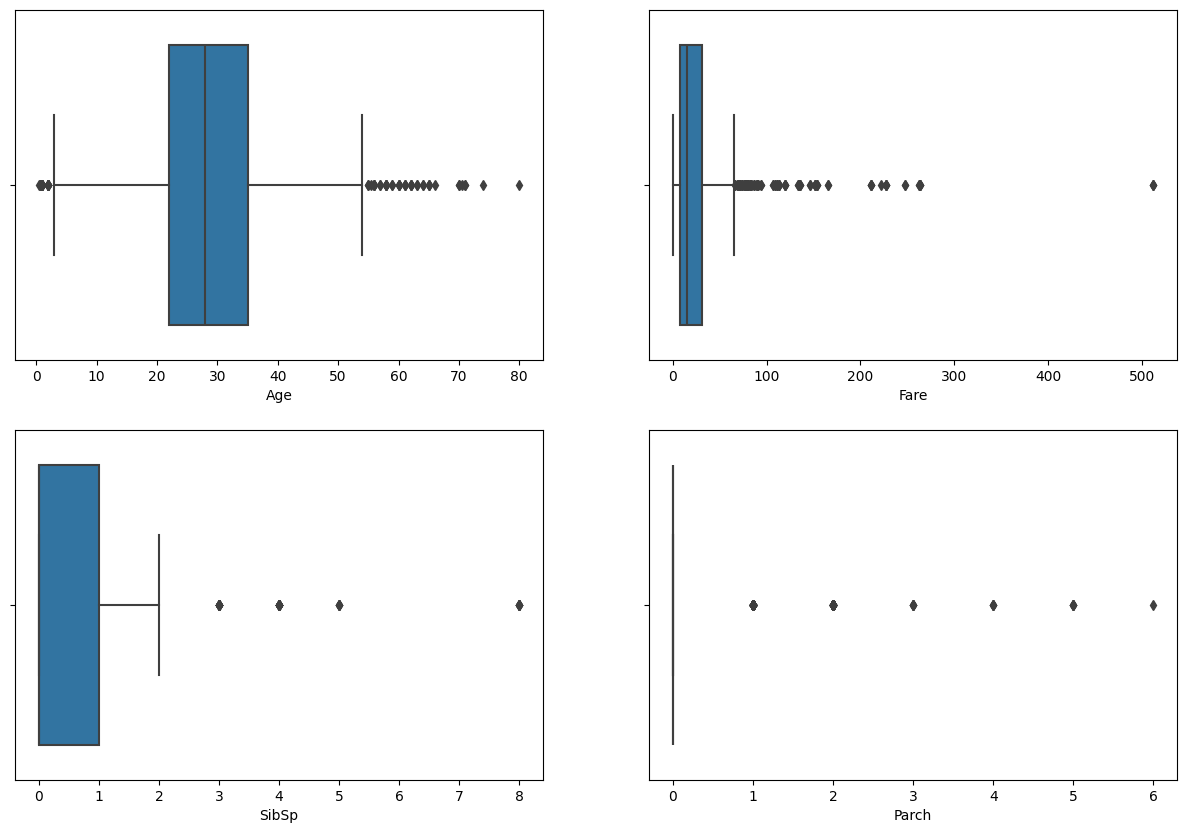

In [208]:
# Boxplots with outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='Age')
sns.boxplot(ax=axes[0, 1], data=df, x='Fare')
sns.boxplot(ax=axes[1, 0], data=df, x='SibSp')
sns.boxplot(ax=axes[1, 1], data=df, x='Parch')
plt.show()


> Based on the previous graphics, I can infer the following:  
> * The age, the number of siblings `(Sibsp)`, and the number of parents/children aboard the Titanic`(Parch)` seems to be authentical data points. However, I have doubts about the `Fare`. It is possible for a passenger to pay more than £500 when most of the passengers paid less than £50 and maximum £300? 

In [209]:
# Filtering passengers with fare greather than £500
df[df['Fare'] > 500]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


> Research:  
`Mr Thomas Drake Martinez Cardeza`, 36, was a wealthy banker from Germantown, PA. He was married to Mary B M Racine, born 27 March 1880 in Besançon, France, who had emigrated to America in 1883. He boarded the Titanic at Cherbourg with his mother Charlotte Cardeza, his Mother's Maid Miss `Annie Moore Ward`, and his manservant `Gustave Lesueur`. They occupied one of the two most luxurious suites on board (B51/3/5, ticket 17755, £512, 6s).  

> With this research I concluded the outliers are not outliers but legitim datapoints.

#### Encoding

Let's check unique values for object type columns

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


> Notice that there are 4 object type features: Name, Sex, Ticket, Embarked.  
For these 4 features I will encode `Sex` and `Embarked`, which have authentical categorical values

In [211]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [212]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [213]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], dtype=int)



In [214]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_female   891 non-null    int32  
 10  Sex_male     891 non-null    int32  
 11  Embarked_C   891 non-null    int32  
 12  Embarked_Q   891 non-null    int32  
 13  Embarked_S   891 non-null    int32  
dtypes: float64(2), int32(5), int64(5), object(2)
memory usage: 80.2+ KB
